## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras
from keras.layers import BatchNormalization

import matplotlib.pyplot as plt
%matplotlib inline

import time

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "None"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
SAVE_BEST_ONLY = [False, True]

#1. 試比較 save_best_only 與否的差異

In [7]:
from keras.callbacks import ModelCheckpoint

t1 = time.time()
model_ckpt = {}
results = {}
for save_best in SAVE_BEST_ONLY:
    # 載入 Callbacks
    """Code Here
    設定 callbacks: model checkpoint
    """
    model_ckpt[save_best] = ModelCheckpoint(filepath = "./Day085_save_best.h5",
                                            monitor = "val_loss",
                                            verbose = 1,
                                            save_best_only = save_best)
    
    """Code Here
    撰寫你的訓練流程並將結果用 dictionary 紀錄
    """
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("\n", "="*50)
    print(f"SAVE_BEST_ONLY = {save_best}\n")
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=[model_ckpt[save_best]]
             )
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    result_tag = f"Save_Best_Only-{str(save_best)}"
    results[result_tag] = {'train-loss': train_loss,
                           'valid-loss': valid_loss,
                           'train-acc': train_acc,
                           'valid-acc': valid_acc}
    
    # Load back
    model = keras.models.load_model("./Day085_save_best.h5")
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    results[result_tag]['test_loss'] = loss_loadback
    results[result_tag]['test_acc'] = acc_loadback

t2 = time.time()
print(f"\ntotal time: {t2-t1} seconds \n")


SAVE_BEST_ONLY = False

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None

50000/50000 [==============================] - 7s 138us/step - loss: 0.7881 - accuracy: 0.7435 - val_loss: 1.5400 - val_accuracy: 0.4889

Epoch 00034: saving model to ./Day085_save_best.h5
Epoch 35/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.7678 - accuracy: 0.7519 - val_loss: 1.5376 - val_accuracy: 0.4937

Epoch 00035: saving model to ./Day085_save_best.h5
Epoch 36/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.7498 - accuracy: 0.7571 - val_loss: 1.5511 - val_accuracy: 0.4912

Epoch 00036: saving model to ./Day085_save_best.h5
Epoch 37/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.7312 - accuracy: 0.7652 - val_loss: 1.5626 - val_accuracy: 0.4890

Epoch 00037: saving model to ./Day085_save_best.h5
Epoch 38/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.7139 - accuracy: 0.7725 - val_loss: 1.5601 - val_accuracy: 0.4853

Epoch 00038: saving model to ./Day085_save_best.h5
Epoch 3

50000/50000 [==============================] - 7s 145us/step - loss: 1.2017 - accuracy: 0.5842 - val_loss: 1.4778 - val_accuracy: 0.4802

Epoch 00014: val_loss did not improve from 1.47219
Epoch 15/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.1777 - accuracy: 0.5926 - val_loss: 1.4674 - val_accuracy: 0.4812

Epoch 00015: val_loss improved from 1.47219 to 1.46737, saving model to ./Day085_save_best.h5
Epoch 16/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.1536 - accuracy: 0.6024 - val_loss: 1.4625 - val_accuracy: 0.4831

Epoch 00016: val_loss improved from 1.46737 to 1.46250, saving model to ./Day085_save_best.h5
Epoch 17/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.1315 - accuracy: 0.6102 - val_loss: 1.4724 - val_accuracy: 0.4833

Epoch 00017: val_loss did not improve from 1.46250
Epoch 18/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.1093 - accuracy: 0.6209 - val_loss: 1.4

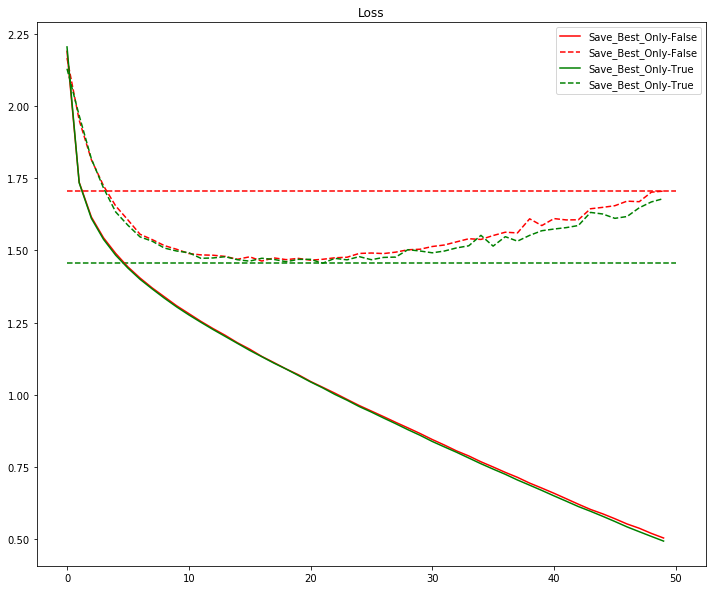

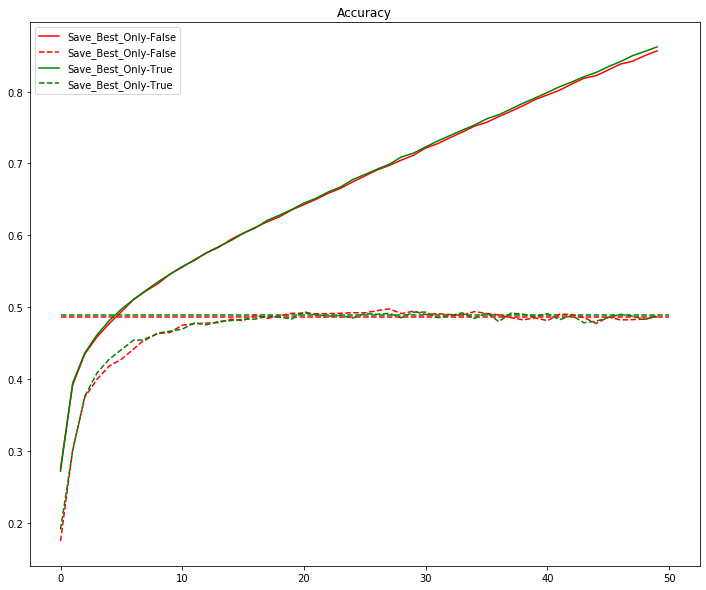

In [8]:
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(12,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=results[cond]['test_loss'],
               xmin=0,
               xmax=len(results[cond]['train-loss']),
               colors=color_bar[i],
               linestyles='--')

plt.title("Loss")
#plt.ylim([0, 5])
plt.legend(loc = 'upper right')
plt.show()
    
plt.figure(figsize=(12,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.hlines(y=results[cond]['test_acc'],
               xmin=0,
               xmax=len(results[cond]['train-acc']),
               colors=color_bar[i],
               linestyles='--')

plt.title("Accuracy")
plt.legend(loc = 'upper left')
plt.show()


#2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [9]:
"""Code Here
設定 callbacks: model checkpoint
"""
checkpoint = ModelCheckpoint(filepath = "./Day085_save_weights.h5",
                             monitor = "val_loss",
                             verbose = 1,
                             save_weights_only = True)

"""Code Here
撰寫你的訓練流程
"""
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[checkpoint]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

# Load back
#model = keras.models.load_model("./Day085_save_weights.h5")
#loss_loadback, acc_loadback = model.evaluate(x_test, y_test)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 7s 140us/step - loss: 0.7743 - accuracy: 0.7488 - val_loss: 1.5061 - val_accuracy: 0.4956

Epoch 00034: saving model to ./Day085_save_weights.h5
Epoch 35/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.7539 - accuracy: 0.7590 - val_loss: 1.5090 - val_accuracy: 0.4975

Epoch 00035: saving model to ./Day085_save_weights.h5
Epoch 36/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.7347 - accuracy: 0.7658 - val_loss: 1.5273 - val_accuracy: 0.4951

Epoch 00036: saving model to ./Day085_save_weights.h5
Epoch 37/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.7161 - accuracy: 0.7726 - val_loss: 1.5433 - val_accuracy: 0.4934

Epoch 00037: saving model to ./Day085_save_weights.h5
Epoch 38/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.6971 - accuracy: 0.7807 - val_loss: 1.5469 - val_accuracy: 0.4978

Epoch 00038: saving model to ./Day085_save_wei

In [10]:
# re-build the model
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

#model.fit(x_train, y_train, 
#          epochs=EPOCHS, 
#          batch_size=BATCH_SIZE, 
#          validation_data=(x_test, y_test), 
#          shuffle=True,
#          callbacks=[checkpoint]
#         )
# Load back
model.load_weights("./Day085_save_weights.h5")

loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
print(f"loss = {loss_loadback}")
print(f"accuracy = {acc_loadback}")


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 